In [ ]:
# import all pacckages required
import random
import copy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [ ]:
# Function to generate a single task with random values
def init_task(dataRate,dataSize,workload):
  task = {
      "dataRate": dataRate,
      "dataSize": dataSize,
      "workload": workload,
  }
  return task

In [ ]:
# Function to generate multiple tasks by calling init_task()
def generateTasks(numTasks,dataRate,dataSize,workload):
  tasks=[]
  for i in range(numTasks):
    if(dataRate == 0):
      dr = random.randrange(50,100,10)
    else: 
      dr= dataRate
    
    if(dataSize == 0):
      ds = (random.randrange(5,45,5)/10)
    else:
      ds = dataSize
    
    if(workload == 0):
      wl = random.randrange(30,55,5)
    else: 
      wl = workload

    task=init_task(dr,ds,wl)
    tasks.append(task)
  return tasks 

In [ ]:
# Function to create a server with given values
def init_server(buffer,freq,t_frac,arrivalRate,serviceRate):
  server={
      'buffer': buffer,
      'frequency': freq,
      'timeFraction' : t_frac,
      'arrivalRate': arrivalRate,
      'serviceRate': serviceRate,
      'prev_delay': 0
  }
  return server

In [ ]:
# Function to geenrate multiple servers with given/random values
def generateServers(numServers,buffer,freq,arrRate,svcRate):
  servers = []
  for i in range(numServers):

    if(buffer == 0):
      taskBufferCapacity = random.randrange(4,11,1)
    else: 
      taskBufferCapacity = buffer

    if(freq == 0):
      frequency = random.randrange(1500,3300,300)
    else:
      frequency = freq

    if(arrRate == 0):
      arrivalRate = random.randrange(20,50,5)
    else:
      arrivalRate = arrRate

    if(svcRate == 0):
      serviceRate = random.randrange(260,310,10);
    else: 
      serviceRate = svcRate

    if(numServers == 4):
      time_fraction = 0.5
    elif(numServers == 5):
      time_fraction = 0.625    
    elif(numServers == 6):
      time_fraction = 0.75
    elif(numServers == 7):
      time_fraction = 0.875
    else:
      time_fraction = 0.9
    server = init_server(taskBufferCapacity,frequency,time_fraction,arrivalRate,serviceRate)
    servers.append(server)
  return servers

In [ ]:
def greedyAlgo(run_tasks,generatedServersOriginal,generatedTasksOriginal,server_num):

  #make a copy of generated tasks and severs
  generatedServers = []
  generatedTasks = []

  #Duplicate Servers
  for li in generatedServersOriginal:
    d2 = copy.deepcopy(li)
    generatedServers.append(d2)
  
  #Duplicate tasks
  for li in generatedTasksOriginal:
    d2 = copy.deepcopy(li)
    generatedTasks.append(d2)

  # iterating through tasks
  server_alloc = []
  delay = []
  # total_time = 0
  for i in range(run_tasks):
    #iterate through servers
    best_time = 1000
    best_server = -1
    best_delay = 0
    for j in range(server_num):
      if(generatedServers[j]['buffer']>=1):
        task_arrival = generatedServers[j]['arrivalRate'] * generatedServers[j]['timeFraction']                         # Aij
        # transmission_delay = task_arrival * (generatedTasks[i]['dataSize'] / generatedTasks[i]['dataRate'])           # Sum of transmission delay of all tasks
        transmission_delay = (generatedTasks[i]['dataSize']/generatedTasks[i]['dataRate'])                              # Lij transmission delay of each task
        computation_time = (generatedTasks[i]['workload'] / generatedServers[j]['frequency'])
        computation_time = computation_time/1000000
        # queuing_delay = task_arrival * (1/ (generatedServers[j]['serviceRate'] - task_arrival))                       # Sum of queuing delay for all tasks
        queuing_delay = (1/ (generatedServers[j]['serviceRate'] - task_arrival))                                        # queuing delay for each task
        total_time = transmission_delay + queuing_delay + computation_time + generatedServers[j]['prev_delay']
        total_delay = transmission_delay + queuing_delay
        
        #check if solution is better than previous
        if(best_time > total_time):
          best_time = total_time
          best_server = j
          best_delay = total_delay
        else:
          # print('previous best time - {} for server - {}'.format(best_time, best_server))
          break
      # else: 
      #   print('Server :  {} cannot accomodate more tasks'.format(j))
    generatedServers[best_server]['buffer'] = generatedServers[best_server]['buffer'] - 1
    generatedServers[best_server]['prev_delay'] = generatedServers[best_server]['prev_delay'] + best_time
    # print('Task: {} ; alloted to server : {} , best time: {}'.format(i,best_server,best_time))
    server_alloc.append(best_server)
    delay.append(best_delay)
  return server_alloc,delay#,generatedServers

In [ ]:
# Run Greedy algo for creating graph no. of tasks vs delay
def tasks_vs_delay(server,task):
  #Define no. of tasks and servers
  # task_num = 30
  # server_num = 4

  #generate tasks and servers
  generatedTasksOriginal = generateTasks(task['task_num'],task['dataRate'],task['dataSize'],task['workload'])
  generatedServersOriginal = generateServers(server['server_num'],server['buffer'],server['freq'],server['arrRate'],server['svcRate'])

  print(bcolors.OKBLUE + 'Server config for this simulation :')
  print(generatedServersOriginal)
  print(bcolors.ENDC)

  print(bcolors.OKBLUE + 'Task config for this simulation :')
  print(generatedTasksOriginal)
  print(bcolors.ENDC)

  delays = []
  serverallocs = []
  tasks = []
  for i in range(5):
    tasks_to_run = 10 + 5*i
    tasks.append(tasks_to_run)
    # print(tasks_to_run)
    serverallocation, taskdelay = greedyAlgo(int(tasks_to_run),generatedServersOriginal,generatedTasksOriginal,server['server_num'])
    delays.append(taskdelay)
    serverallocs.append(serverallocation)
  # print(delays)
  total_delays = []
  for i in range(5):
    total_delay = sum(delays[i])
    total_delays.append(total_delay)
  print(total_delays)

  #Plot graph for task vs delay
  plt.bar(tasks,total_delays, color='black', width=1)
  plt.show()

In [ ]:
print(bcolors.BOLD + bcolors.FAIL   + "Paper accurate graph")
print(bcolors.ENDC)
tasks_vs_delay({'server_num':4,'buffer': 10, 'freq':1800,'arrRate':25,'svcRate':250},{'task_num': 30,'dataRate': 100,'dataSize': 1.5,'workload':40})

print(bcolors.BOLD + bcolors.FAIL   + "Random generated graph")
print(bcolors.ENDC)
tasks_vs_delay({'server_num':4,'buffer': 10, 'freq':1800,'arrRate':25,'svcRate':250},{'task_num': 30,'dataRate': 0,'dataSize': 0,'workload':0})

0.7431980906921242
0.7307189542483659
0.7202404809619242
0.7113172541743965
0.7036269430051811


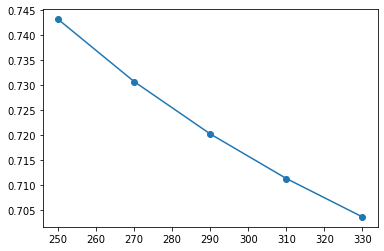

In [ ]:
# Function for service rate vs delay plot
def service_rate_vs_delay(server,generatedTasksOriginal):
  # generatedTasksOriginal = generateTasks(task['task_num'],task['dataRate'],task['dataSize'],task['workload'])    
  generatedServersOriginal = generateServers(server['server_num'],server['buffer'],server['freq'],server['arrRate'],server['svcRate'])

  # print(bcolors.OKBLUE + 'Server config for this simulation :')
  # print(generatedServersOriginal)
  # print(bcolors.ENDC)

  # print(bcolors.OKBLUE + 'Task config for this simulation :')
  # print(generatedTasksOriginal)
  # print(bcolors.ENDC)

  serverallocation, taskdelay = greedyAlgo(int(len(generatedTasksOriginal)),generatedServersOriginal,generatedTasksOriginal,server['server_num'])
  
  print(sum(taskdelay))
  return sum(taskdelay)

svc_delays = []
svcrates = []
generatedTasksOriginal = generateTasks(30,100,2,55)
for i in range(5):
  svcrate = 250 + 20*i
  delay = service_rate_vs_delay({'server_num':8,'buffer': 10, 'freq':2500,'arrRate':45,'svcRate':svcrate},generatedTasksOriginal) #{'task_num': 30,'dataRate': 0,'dataSize': 0,'workload':0})
  svc_delays.append(delay)
  svcrates.append(svcrate)

xpoints = np.array(svcrates)
ypoints = np.array(svc_delays)
plt.plot(xpoints,ypoints,marker='o')